In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import pandas as pd
import warnings


In [2]:

data = pd.read_csv("dataset/data.csv")

# BIỂU ĐỒ VIOLIN: MỐI TƯƠNG QUAN GIỮA MỨC ĐỘ TRIGLYCERIDE TRONG MÁU VÀ NGUY CƠ MẮC BỆNH TIM Ở CẢ NAM VÀ NỮ


1. **Các thuộc tính sử dụng**
- `Triglycerides`: đây là chỉ số đo lường lượng triglycerides trong máu, một yếu tố nguy cơ chính đối với bệnh tim.
- `Heart Disease`: thuộc tính chỉ nhận 2 giá trị 0 (không) hoặc 1 (có), thể hiện nguy cơ mắc bệnh tim, giúp phân loại người có và không có nguy cơ.
- `Gender`: thuộc tính gồm 2 giá trị nam và nữ. 

2. **Loại biểu đồ**

    **Violin Plot**: là một loại biểu đồ giúp trực quan hóa phân bố của dữ liệu thông qua các hình dạng giống như đàn violin. Biểu đồ này không chỉ hiển thị trung bình và phương sai mà còn cho thấy sự phân bố của dữ liệu, giúp phát hiện các đặc điểm như độ đối xứng và các điểm ngoại lai.

3. **Ý nghĩa của biểu đồ**

    Violin plot sẽ cho thấy sự khác biệt về mức triglyceride giữa hai giới tính và giữa những người có nguy cơ mắc bệnh tim và không có nguy cơ. Sự phân bố có thể cho thấy sự gia tăng nồng độ triglyceride ở nhóm có nguy cơ bệnh tim, điều này có ý nghĩa vô cùng to lớn đối với các bác sĩ, chuyên gia y tế, giúp họ khuyến cáo bệnh nhân có mức triglycerid cao cảnh giác. 

4. **Nguyên nhân sử dụng**

    Việc sử dụng violin plot là hợp lý để trực quan hóa dữ liệu phân bố liên quan đến nguy cơ bệnh tim và giúp nhận diện các mô hình khác nhau trong các nhóm giới tính. Nó cho phép người nghiên cứu nhận thấy các khác biệt rõ ràng giữa các nhóm trong cùng một biểu đồ mà không cần phải vẽ nhiều biểu đồ khác nhau.

5. **Kết luận**
-  Biểu đồ cho thấy những người bị bệnh tim thường có nồng độ triglycerid trong máu cao hơn người không bị. 
-  Điều này cho thấy tầm quan trọng của việc kiểm soát nồng độ triglycerid trong máu ở mức an toàn để bảo vệ tim mạch và sức khỏe.

In [3]:

fig = px.violin(
    data,
    y='Triglycerides',
    x='Heart Attack Risk',
    color='Sex',
    box=True,  
    points='all', 
    labels={'Triglycerides': 'Triglycerides Levels', 'Heart Attack Risk': 'Heart Attack Risk'},
    color_discrete_sequence=["#0cc0df", "#ffde59"]  
)
fig.update_layout(
    #title="Violin Plot of Triglycerides by Heart Attack Risk and Sex",
    title="Biểu đồ Violin mối liên hệ giữa lượng Triglycerides với nguy cơ bị bệnh tim ở cả 2 giới",
    title_x=0.5,  
    title_font=dict(size=20)  
)
for i, trace in enumerate(fig.data):
    if i % 2 == 0:
        trace.marker.color = "#0cc0df"   
    else:
        trace.marker.color = "#ffde59"   
fig.show()

# BIỂU ĐỒ ĐƯỜNG: SỐ LƯỢNG BỆNH NHÂN TIỂU ĐƯỜNG THEO TỪNG NHÓM TUỔI

1. **Các thuộc tính sử dụng**
- `Age`: nhóm tuổi (các khoảng tuổi từ <30, 30-39, ... đến >=90).
2. **Loại biểu đồ**

    **Biểu đồ đường:** : là  loại biểu đồ  phù hợp để thể hiện sự thay đổi của số lượng bệnh nhân tiểu đường theo các nhóm tuổi, giúp nhận diện xu hướng rõ ràng hơn.

3. **Ý nghĩa của biểu đồ**

    Biểu đồ cho thấy số bệnh nhân ở nhóm <30 tuổi chiếm tỉ lệ khá cao, số bệnh nhân ở các nhóm tuổi còn lại cũng khá cao và xem xem nhau. 

4. **Nguyên nhân sử dụng**

    Sử dụng biểu đồ đường giúp người xem dễ dàng theo dõi sự thay đổi số lượng bệnh nhân qua các nhóm tuổi, theo dõi được xu hướng, từ đó đưa ra quyết định dựa trên dữ liệu thống kê.

5. **Kết luận**
- Thông qua biểu đồ, có thể xác định được nhóm tuổi nào có số lượng bệnh nhân tiểu đường cao nhất. 
- Người từ trẻ đến cao tuổi đều có nguy cơ mắc bệnh tiểu đương xem xem nhau. Đặc biệt số bệnh nhân mắc bệnh tiểu đường dưới 30 tuổi là cao nhất ! 

C:\Users\vietl\AppData\Local\Temp\ipykernel_32864\2042307140.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



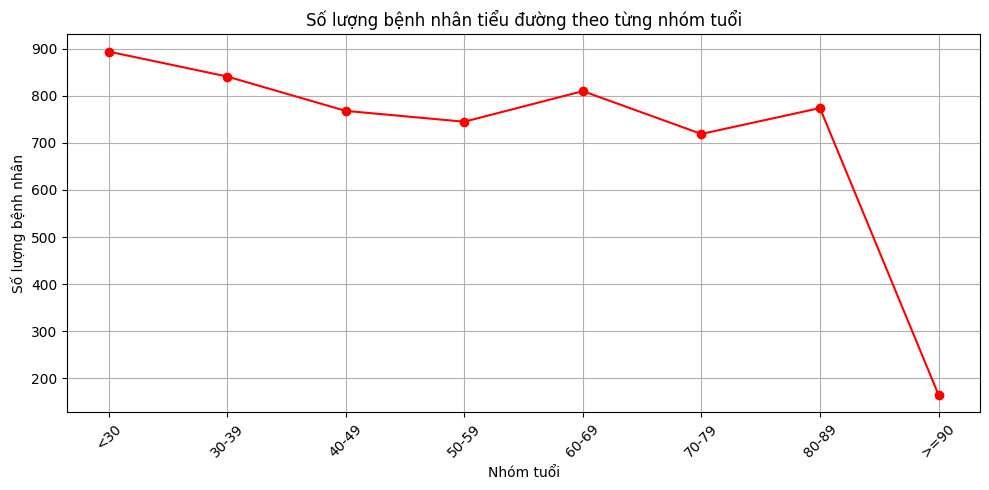

In [4]:

bins = [0, 29, 39, 49, 59, 69, 79, 89, 100]  # Định nghĩa các ranh giới nhóm tuổi
labels = ['<30', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '>=90']  # Nhãn cho các nhóm tuổi
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)
diabetes_count_by_age_group = data[data['Diabetes'] == 1].groupby('Age Group')['Patient ID'].count().reset_index()
diabetes_count_by_age_group.columns = ['Age Group', 'Diabetes Patient Count']
diabetes_count_by_age_group = diabetes_count_by_age_group.sort_values(by='Age Group')
plt.figure(figsize=(10, 5))
plt.plot(diabetes_count_by_age_group['Age Group'], diabetes_count_by_age_group['Diabetes Patient Count'], 
         marker='o', linestyle='-', color='red')  # Đổi màu line chart thành màu đỏ
plt.title('Số lượng bệnh nhân tiểu đường theo từng nhóm tuổi')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Số lượng bệnh nhân')
plt.xticks(rotation=45)  
plt.grid()
plt.tight_layout()
plt.show()

# BIỂU ĐỒ VENN: MỐI QUAN HỆ GIỮA BA YẾU TỐ SỨC KHỎE QUAN TRỌNG: HÚT THUỐC, BÉO PHÌ VÀ TIỂU ĐƯỜNG


1. **Các thuộc tính sử dụng**
- `Smoking`: thuộc tính cho biết bệnh nhân có hút thuốc hay không (1: Có, 0: Không).
- `Obesity`: thuộc tính cho biết bệnh nhân có bị béo phì hay không (1: Có, 0: Không).
- `Diabetes`: thuộc tính cho biết bệnh nhân có mắc tiểu đường hay không (1: Có, 0: Không).
- `Patient ID`: mã định danh của từng bệnh nhân, sử dụng để xác định các nhóm bệnh nhân theo từng yếu tố.

2. **Loại biểu đồ**

    **Biểu đồ Venn**: đây là loại biểu đồ trực quan hóa mối quan hệ giữa các tập hợp, thể hiện số lượng bệnh nhân thuộc các nhóm khác nhau và các vùng giao nhau giữa chúng.

3. **Ý nghĩa của biểu đồ**

- Biểu đồ Venn giúp phân tích và hiểu rõ hơn về sự giao thoa giữa ba yếu tố sức khỏe: tiểu đường, béo phì, và hút thuốc. Các nhóm bệnh nhân được phân tích cụ thể như sau:

    - Bệnh nhân chỉ bị tiểu đường mà không bị béo phì hay hút thuốc.
    - Bệnh nhân chỉ bị béo phì mà không có tiểu đường hay hút thuốc.
    - Bệnh nhân chỉ hút thuốc mà không có tiểu đường hay béo phì.
    - Bệnh nhân bị tiểu đường và béo phì nhưng không hút thuốc.
    - Bệnh nhân bị béo phì và hút thuốc nhưng không có tiểu đường.
    - Bệnh nhân hút thuốc và tiểu đường nhưng không bị béo phì.
    - Bệnh nhân mắc cả ba vấn đề sức khỏe: tiểu đường, béo phì, và hút thuốc.

- Việc xác định rõ các nhóm này sẽ giúp các chuyên gia y tế đưa ra các chiến lược phòng ngừa và can thiệp y tế phù hợp, đồng thời giúp bệnh nhân nhận thức và phòng tránh tốt hơn đối với từng nguy cơ sức khỏe cụ thể.


4. **Nguyên nhân sử dụng**

- Biểu đồ Veen giúp các nhà nghiên cứu và các chuyên gia y tế trực quan hóa và phân tích mối quan hệ giữa các yếu tố nguy cơ sức khỏe.
- Xác định nhóm bệnh nhân nào có nguy cơ cao mắc nhiều vấn đề sức khỏe cùng một lúc.
- Đưa ra những thông điệp sức khỏe công cộng và hướng dẫn chính sách dựa trên sự hiểu biết về các yếu tố nguy cơ liên quan.

5. **Kết luận**
- Số người chỉ mắc tiểu đường khá ít (306) và chỉ bị béo phì khá ít (165), chứng tỏ tiểu đường và béo phì thường đi kèm với các vấn đề khác. 
- Số người bị tiểu đường và hút thuốc khá lớn (2517), chứng tỏ 2 yếu tố này thường xuất hiện đồng thời với nhau. Người bệnh ít khi chỉ bị 1 trong 2.
- Số lượng bệnh nhân mắc cả ba yếu tố (2610) cho thấy có sự giao thoa lớn giữa tiểu đường, hút thuốc và béo phì. Điều này có thể gợi ý rằng các yếu tố này không chỉ xảy ra độc lập mà còn có thể tương tác lẫn nhau, dẫn đến tình trạng sức khỏe nghiêm trọng hơn.
- Từ đó rút ra cần đề phòng cả 

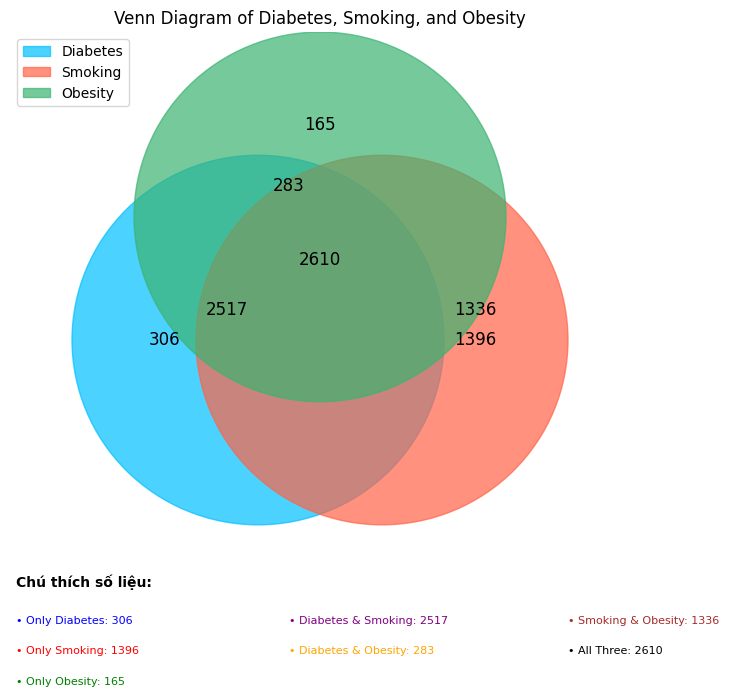

In [5]:

diabetes_patients = set(data[data['Diabetes'] == 1]['Patient ID'])
smoking_patients = set(data[data['Smoking'] == 1]['Patient ID'])
obesity_patients = set(data[data['Obesity'] == 1]['Patient ID'])
only_diabetes = len(diabetes_patients - smoking_patients - obesity_patients)
only_smoking = len(smoking_patients - diabetes_patients - obesity_patients)
only_obesity = len(obesity_patients - diabetes_patients - smoking_patients)
diabetes_smoking = len(diabetes_patients & smoking_patients - obesity_patients)
diabetes_obesity = len(diabetes_patients & obesity_patients - smoking_patients)
smoking_obesity = len(smoking_patients & obesity_patients - diabetes_patients)
all_three = len(diabetes_patients & smoking_patients & obesity_patients)
plt.figure(figsize=(8, 8))
ax = plt.gca()
circle1 = plt.Circle((0.4, 0.5), 0.3, color='deepskyblue', alpha=0.7, label="Diabetes")
circle2 = plt.Circle((0.6, 0.5), 0.3, color='tomato', alpha=0.7, label="Smoking")
circle3 = plt.Circle((0.5, 0.7), 0.3, color='mediumseagreen', alpha=0.7, label="Obesity")
ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(circle3)
plt.text(0.25, 0.5, f"{only_diabetes}", ha='center', va='center', fontsize=12, color='black')      
plt.text(0.75, 0.5, f"{only_smoking}", ha='center', va='center', fontsize=12, color='black')      
plt.text(0.5, 0.85, f"{only_obesity}", ha='center', va='center', fontsize=12, color='black')      
plt.text(0.35, 0.55, f"{diabetes_smoking}", ha='center', va='center', fontsize=12, color='black')
plt.text(0.45, 0.75, f"{diabetes_obesity}", ha='center', va='center', fontsize=12, color='black')  
plt.text(0.75, 0.55, f"{smoking_obesity}", ha='center', va='center', fontsize=12, color='black')    
plt.text(0.5, 0.63, f"{all_three}", ha='center', va='center', fontsize=12, color='black')           
plt.text(0.01, 0.1, "Chú thích số liệu:", fontsize=10, ha='left', fontweight='bold')
plt.text(0.01, 0.04, f"• Only Diabetes: {only_diabetes}", fontsize=8, ha='left', color='blue')
plt.text(0.01, -0.01, f"• Only Smoking: {only_smoking}", fontsize=8, ha='left', color='red')
plt.text(0.01, -0.06, f"• Only Obesity: {only_obesity}", fontsize=8, ha='left', color='green')
plt.text(0.45, 0.04, f"• Diabetes & Smoking: {diabetes_smoking}", fontsize=8, ha='left', color='purple')
plt.text(0.45, -0.01, f"• Diabetes & Obesity: {diabetes_obesity}", fontsize=8, ha='left', color='orange')
plt.text(0.9, 0.04, f"• Smoking & Obesity: {smoking_obesity}", fontsize=8, ha='left', color='brown')
plt.text(0.9, -0.01, f"• All Three: {all_three}", fontsize=8, ha='left', color='black')
plt.legend(loc="upper left")
plt.title("Venn Diagram of Diabetes, Smoking, and Obesity")
plt.axis("off")  
plt.show()